## Petrol Consumption Model

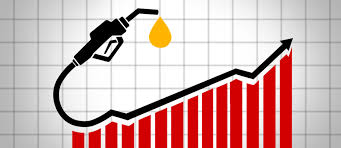

In [1]:
from IPython import display 
display.Image("\\petrol.jpg", width=1000, height=15)

In [2]:
# Load libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
dataset=pd.read_csv("\\PetrolConsumption.csv")
# display the first 5 rows
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
# randomly selected 10 rows/observations
dataset.sample(10)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
43,7.0,3745,2611,0.508,591
27,7.5,3846,9061,0.579,631
20,7.0,4593,7834,0.663,649
21,8.0,4983,602,0.602,540
1,9.0,4092,1250,0.572,524
28,8.0,4188,5975,0.563,574
33,7.5,3357,4121,0.547,628
29,9.0,3601,4650,0.493,534
23,9.0,4258,4686,0.517,547
13,7.0,4207,6580,0.545,508


In [5]:
#Data Summary
print("Column List\n", dataset.columns)
print("DataTypes\n ",dataset.dtypes)
print("\nShape of Dataset: ",dataset.shape)
print("\nSize of dataset: ",dataset.size)
print("\nDataset Info\n",dataset.info())

Column List
 Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')
DataTypes
  Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

Shape of Dataset:  (48, 5)

Size of dataset:  240
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Petrol_tax                      48 non-null float64
Average_income                  48 non-null int64
Paved_Highways                  48 non-null int64
Population_Driver_licence(%)    48 non-null float64
Petrol_Consumption              48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB

Dataset Info
 None


In [6]:
#Descriptive Statistics
#checking the counts
print("Total Records:\n",dataset.count())
#statistical summary 
print("Data Description",dataset.describe())   

Total Records:
 Petrol_tax                      48
Average_income                  48
Paved_Highways                  48
Population_Driver_licence(%)    48
Petrol_Consumption              48
dtype: int64
Data Description        Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.000000     4735.500000   
75%      8.125000     4578.750000     7156.000000   
max     10.000000     5342.000000    17782.000000   

       Population_Driver_licence(%)  Petrol_Consumption  
count                     48.000000           48.000000  
mean                       0.570333          576.770833  
std                        0.055470          111.885816  
min                        0.451000          344.000000  
25%        

                              Petrol_tax  Average_income  Paved_Highways  \
Petrol_tax                      1.000000        0.012665       -0.522130   
Average_income                  0.012665        1.000000        0.050163   
Paved_Highways                 -0.522130        0.050163        1.000000   
Population_Driver_licence(%)   -0.288037        0.157070       -0.064129   
Petrol_Consumption             -0.451280       -0.244862        0.019042   

                              Population_Driver_licence(%)  Petrol_Consumption  
Petrol_tax                                       -0.288037           -0.451280  
Average_income                                    0.157070           -0.244862  
Paved_Highways                                   -0.064129            0.019042  
Population_Driver_licence(%)                      1.000000            0.698965  
Petrol_Consumption                                0.698965            1.000000  


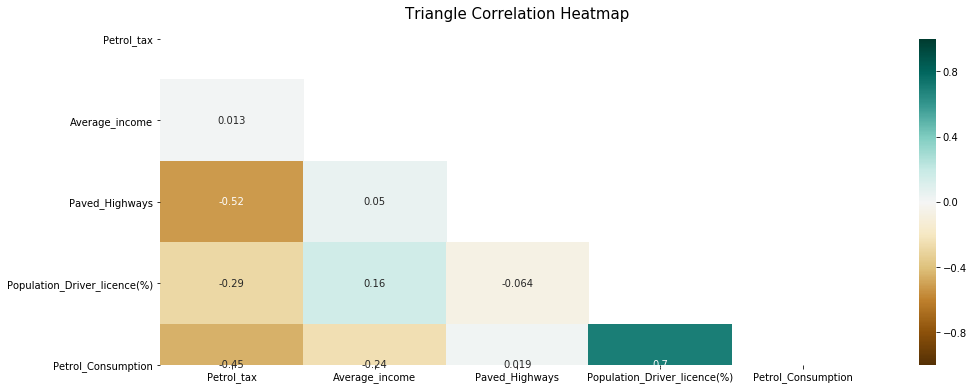

In [7]:
#Correlation Matrix
print(dataset.corr())

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataset.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':15}, pad=20);

**Note: 

1. The Petrol Consumption increases with rise in population driver license(%). This shows strong positive relation.

2. The relation between Paved_Highways & Petrol tax are inversely related. (Those highways well maintained, suitable for travel -- the petrol taxes are kept low).
3. There is a relation between petrol consumption and petrol taxes inversely strong. IF petrol taxes increases--consumption decreases.

In [8]:
dataset.corr().unstack()

Petrol_tax                    Petrol_tax                      1.000000
                              Average_income                  0.012665
                              Paved_Highways                 -0.522130
                              Population_Driver_licence(%)   -0.288037
                              Petrol_Consumption             -0.451280
Average_income                Petrol_tax                      0.012665
                              Average_income                  1.000000
                              Paved_Highways                  0.050163
                              Population_Driver_licence(%)    0.157070
                              Petrol_Consumption             -0.244862
Paved_Highways                Petrol_tax                     -0.522130
                              Average_income                  0.050163
                              Paved_Highways                  1.000000
                              Population_Driver_licence(%)   -0.064129
      

In [9]:
# strong positive correlations
corrpairs = dataset.corr().unstack()
corrpairs[(corrpairs > 0.4)]

Petrol_tax                    Petrol_tax                      1.000000
Average_income                Average_income                  1.000000
Paved_Highways                Paved_Highways                  1.000000
Population_Driver_licence(%)  Population_Driver_licence(%)    1.000000
                              Petrol_Consumption              0.698965
Petrol_Consumption            Population_Driver_licence(%)    0.698965
                              Petrol_Consumption              1.000000
dtype: float64

In [10]:
# strong negative correlations
corrpairs = dataset.corr().unstack()
corrpairs[(corrpairs < -0.4)]

Petrol_tax          Paved_Highways       -0.52213
                    Petrol_Consumption   -0.45128
Paved_Highways      Petrol_tax           -0.52213
Petrol_Consumption  Petrol_tax           -0.45128
dtype: float64

In [11]:
print(dataset.cov())

                               Petrol_tax  Average_income  Paved_Highways  \
Petrol_tax                       0.903963        6.907376   -1.733273e+03   
Average_income                   6.907376   329044.226950    1.004666e+05   
Paved_Highways               -1733.273333   100466.602837    1.219062e+07   
Population_Driver_licence(%)    -0.015191        4.997823   -1.242027e+01   
Petrol_Consumption             -48.006135   -15715.336879    7.438736e+03   

                              Population_Driver_licence(%)  Petrol_Consumption  
Petrol_tax                                       -0.015191          -48.006135  
Average_income                                    4.997823       -15715.336879  
Paved_Highways                                  -12.420270         7438.735816  
Population_Driver_licence(%)                      0.003077            4.338014  
Petrol_Consumption                                4.338014        12518.435727  


In [13]:
petrol_data=dataset.copy()

#Data Visualization

Text(0.5, 1.0, 'BoxPlot of Variables')

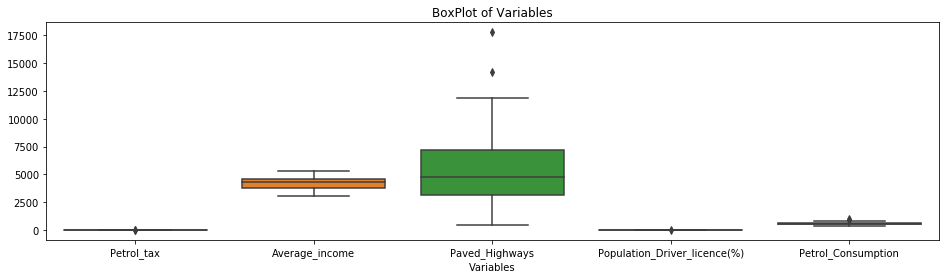

In [14]:
plt.figure(figsize=(16, 4))
sns.boxplot(data=petrol_data)
plt.xlabel("Variables")
plt.title("BoxPlot of Variables")

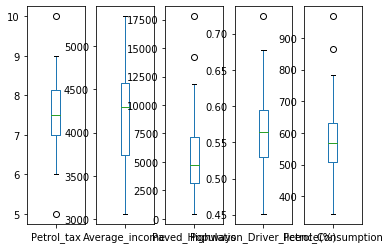

In [15]:
# box and whisker plots
petrol_data.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

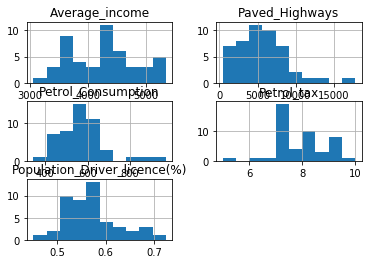

In [16]:
# histograms
petrol_data.hist()
plt.show()

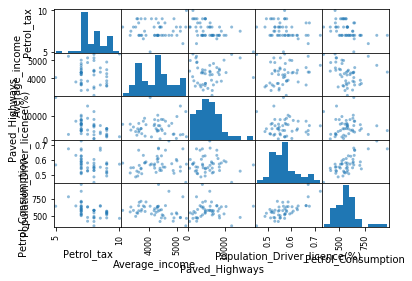

In [17]:
# scatter plot matrix
scatter_matrix(petrol_data)
plt.show()

C:\Users\Urmisha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


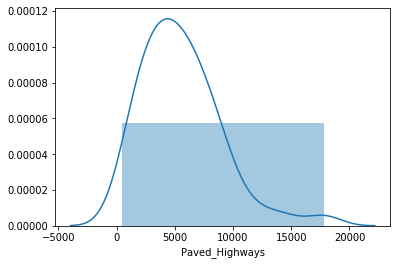

In [18]:
sns.distplot(petrol_data['Paved_Highways'],kde=True, bins=1)

In [19]:
##Checking for Skewness & Kurtosis in "Paved_Highways" column
from scipy.stats import kurtosis
from scipy.stats import skew
from statistics import median 

print("mean : ", np.mean(petrol_data['Paved_Highways']))
print("var  : ", np.var(petrol_data['Paved_Highways']))
print("Std.dev  : ", np.std(petrol_data['Paved_Highways']))
print("median : ",median(petrol_data['Paved_Highways']))
print("skew : ",skew(petrol_data['Paved_Highways']))
print("kurt : ",kurtosis(petrol_data['Paved_Highways']))

mean :  5565.416666666667
var  :  11936650.993055554
Std.dev  :  3454.94587411374
median :  4735.5
skew :  1.164772608126722
kurt :  1.9401949404135141


C:\Users\Urmisha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


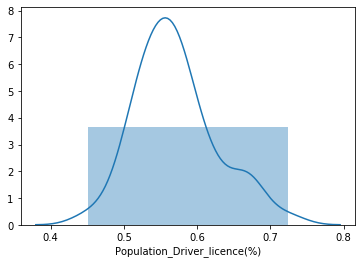

In [20]:
sns.distplot(petrol_data['Population_Driver_licence(%)'],kde=True, bins=1)

In [21]:
##Checking for Skewness & Kurtosis in "Population_Driver_licence(%)" column
from scipy.stats import kurtosis
from scipy.stats import skew
from statistics import median 

print("mean : ", np.mean(petrol_data['Population_Driver_licence(%)']))
print("var  : ", np.var(petrol_data['Population_Driver_licence(%)']))
print("Std.dev  : ", np.std(petrol_data['Population_Driver_licence(%)']))
print("median : ",median(petrol_data['Population_Driver_licence(%)']))
print("skew : ",skew(petrol_data['Population_Driver_licence(%)']))
print("kurt : ",kurtosis(petrol_data['Population_Driver_licence(%)']))

mean :  0.5703333333333334
var  :  0.003012847222222222
Std.dev  :  0.05488940901687886
median :  0.5645
skew :  0.6305235417311285
kurt :  0.3109600243930464


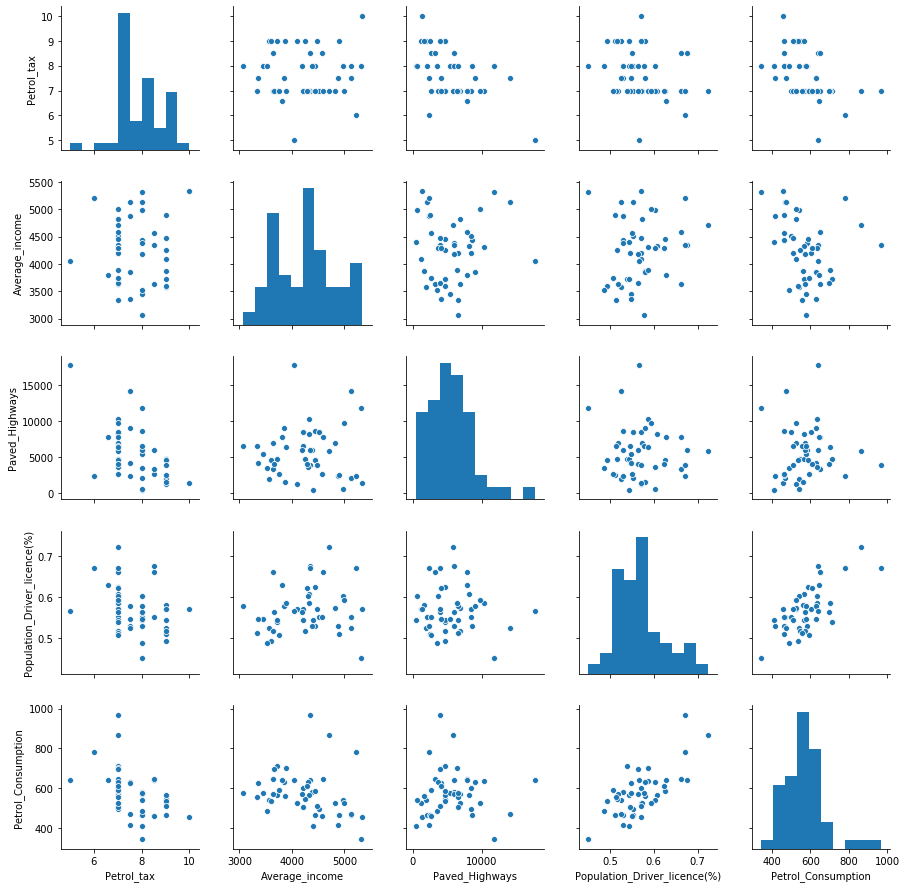

In [22]:
sns.pairplot(petrol_data)

In [23]:
#Checking for missing values
print("Checking of the null values within the dataset",petrol_data.isnull().sum())

Checking of the null values within the dataset Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64


***Note: There is no missing values in the dataset.

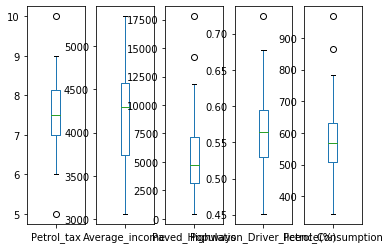

In [24]:
# box and whisker plots
petrol_data.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

**Note: There are outliers. Needs to fix this.

In [25]:
petrol_data.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [26]:
#Removing the outliers
ll = petrol_data['Paved_Highways'].mean() - 3*petrol_data['Paved_Highways'].std()
print("Lower Bound:", ll)
ul = petrol_data['Paved_Highways'].mean() + 3*petrol_data['Paved_Highways'].std()
print("Upper Bound:", ul)

Lower Bound: -4909.10483156996
Upper Bound: 16039.938164903295


In [27]:
#Detecting Outliers
pavedhighways_Outliers = petrol_data[(petrol_data['Paved_Highways']>ul) | (petrol_data['Paved_Highways']<ll)]
print(len(pavedhighways_Outliers))

1


In [28]:
# Creating new Dataframe by removing Outliers
petrol_data.iloc[:,2] = petrol_data[(petrol_data['Paved_Highways']>ll) & (petrol_data['Paved_Highways']<ul)]
petrol_data['Paved_Highways'].shape

(48,)

In [29]:
#Removing the outliers
ll = petrol_data['Population_Driver_licence(%)'].mean() - 3*petrol_data['Population_Driver_licence(%)'].std()
print("Lower Bound:", ll)
ul = petrol_data['Population_Driver_licence(%)'].mean() + 3*petrol_data['Population_Driver_licence(%)'].std()
print("Upper Bound:", ul)

#Detecting Outliers
driver_Outliers = petrol_data[(petrol_data['Population_Driver_licence(%)']>ul) | (petrol_data['Population_Driver_licence(%)']<ll)]
print(len(driver_Outliers))

# Creating new Dataframe by removing Outliers
petrol_data.iloc[:,3] = petrol_data[(petrol_data['Population_Driver_licence(%)']>ll) & (petrol_data['Population_Driver_licence(%)']<ul)]
petrol_data.iloc[:,3].shape

Lower Bound: 0.4039225368341598
Upper Bound: 0.7367441298325069
0


(48,)

In [30]:
#Removing the outliers
ll = petrol_data['Petrol_Consumption'].mean() - 3*petrol_data['Petrol_Consumption'].std()
print("Lower Bound:", ll)
ul = petrol_data['Petrol_Consumption'].mean() + 3*petrol_data['Petrol_Consumption'].std()
print("Upper Bound:", ul)

#Detecting Outliers
petrolconsumption_Outliers = petrol_data[(petrol_data['Petrol_Consumption']>ul) | (petrol_data['Petrol_Consumption']<ll)]
print(len(petrolconsumption_Outliers))

# Creating new Dataframe by removing Outliers
petrol_data.iloc[:,4] = petrol_data[(petrol_data['Petrol_Consumption']>ll) & (petrol_data['Petrol_Consumption']<ul)]
petrol_data.iloc[:,4].shape

Lower Bound: 241.11338660742922
Upper Bound: 912.4282800592375
1


(48,)

In [31]:
#Removing the outliers
ll = petrol_data['Petrol_tax'].mean() - 3*petrol_data['Petrol_tax'].std()
print("Lower Bound:", ll)
ul = petrol_data['Petrol_tax'].mean() + 3*petrol_data['Petrol_tax'].std()
print("Upper Bound:", ul)

#Detecting Outliers
tax_Outliers = petrol_data[(petrol_data['Petrol_tax']>ul) | (petrol_data['Petrol_tax']<ll)]
print(len(tax_Outliers))

# Creating new Dataframe by removing Outliers
petrol_data.iloc[:,0] = petrol_data[(petrol_data['Petrol_tax']>ll) & (petrol_data['Petrol_tax']<ul)]
petrol_data.iloc[:,0].shape

Lower Bound: 4.816024078517792
Upper Bound: 10.520642588148874
0


(48,)

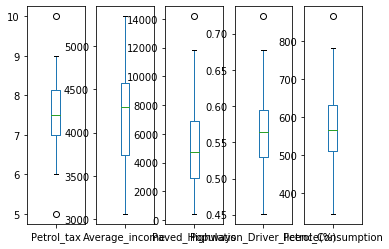

In [32]:
# box and whisker plots
petrol_data.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

In [33]:
## Splitting the dataset into training & testing
# separate out the dependent variable and the independet variables

# collection of independent variables
X = dataset.iloc[:,0:4] # collection of all the independent variables 

# contains the dependent variable
y = dataset.iloc[:,4] # contains the dependent variable (Petrol Consumption)

In [34]:
X.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [35]:
y.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

In [36]:
# Split-out training and validation data sets
from sklearn.model_selection import train_test_split
SEED=21
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
print(X_train.shape)
print(Y_train.shape)

(38, 4)
(38,)


#### Model Building

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Building Multiple Linear Regression Model
model1 = LinearRegression()
model1.fit(X_train, Y_train)

# Make predictions on test dataset
predictions = model1.predict(X_test)
predictions

# print the coefficients
print ("Intercept: ", model1.intercept_) # y = mx + c then intercept = c
print ("Coefficients: ", model1.coef_) # y = mx + c then slope = m


Intercept:  250.08764874985116
Coefficients:  [-3.24688753e+01 -5.69916475e-02 -1.40725342e-03  1.43762925e+03]


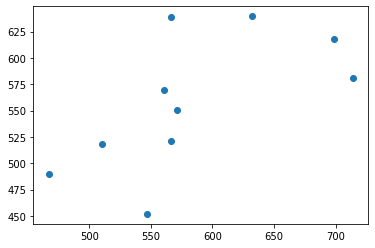

In [38]:
plt.scatter(Y_test, predictions)

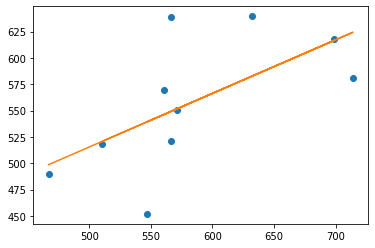

In [39]:
# Plotting along with the regression line

plt.plot(Y_test, predictions, 'o')
m, b = np.polyfit(Y_test, predictions, 1)
plt.plot(Y_test, m*Y_test + b)

In [40]:
# Evaluate predictions
from sklearn import metrics

# Model Metrics
print("R-Square: ", metrics.r2_score(Y_test, predictions))
print("Adjusted R- Square: ", 1 - (1-model1.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(Y_test, predictions))
print("MSE: ", metrics.mean_squared_error(Y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

R-Square:  0.23028626891053616
Adjusted R- Square:  0.6398649750357697
MAE:  49.4345007829272
MSE:  4179.861142445536
RMSE:  64.6518456228864


In [41]:
# Building Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions = model2.predict(X_test)
predictions

array([457., 610., 628., 508., 635., 631., 580., 541., 508., 498.])

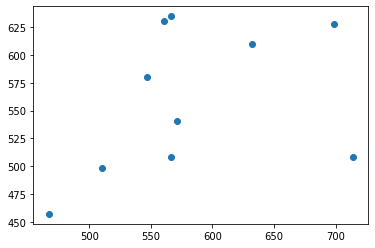

In [42]:
plt.scatter(Y_test,predictions)

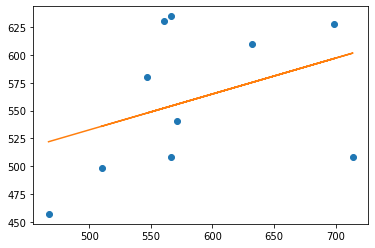

In [43]:
# Plotting along with the regression line
plt.plot(Y_test, predictions, 'o')
m, b = np.polyfit(Y_test, predictions, 1)
plt.plot(Y_test, m*Y_test + b)

In [44]:
# Evaluate predictions
from sklearn import metrics

# Model Metrics
print("R-Square: ", metrics.r2_score(Y_test, predictions))
print("Adjusted R- Square: ", 1 - (1-model2.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(Y_test, predictions))
print("MSE: ", metrics.mean_squared_error(Y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

R-Square:  -0.16416624159133475
Adjusted R- Square:  0.8825564683644589
MAE:  58.1
MSE:  6321.9
RMSE:  79.51037668128608


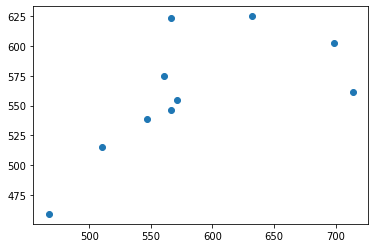

In [45]:
# Building Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions = model3.predict(X_test)
predictions

plt.scatter(Y_test,predictions)

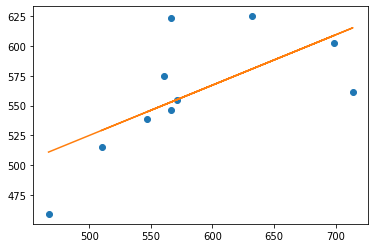

In [46]:
# Plotting along with the regression line
plt.plot(Y_test, predictions, 'o')
m, b = np.polyfit(Y_test, predictions, 1)
plt.plot(Y_test, m*Y_test + b)

In [47]:
# Evaluate predictions
from sklearn import metrics

# Model Metrics
print("R-Square: ", metrics.r2_score(Y_test, predictions))
print("Adjusted R- Square: ", 1 - (1-model3.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(Y_test, predictions))
print("MSE: ", metrics.mean_squared_error(Y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

R-Square:  0.32017325211171943
Adjusted R- Square:  0.8669671679062703
MAE:  38.46899999999999
MSE:  3691.7379699999974
RMSE:  60.75967387996744


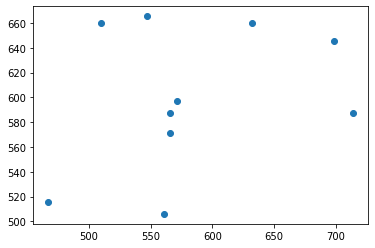

In [48]:
# Building kNN Regression Model
from sklearn.neighbors import KNeighborsRegressor
model4 = KNeighborsRegressor()
model4.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions = model4.predict(X_test)
predictions

plt.scatter(Y_test,predictions)

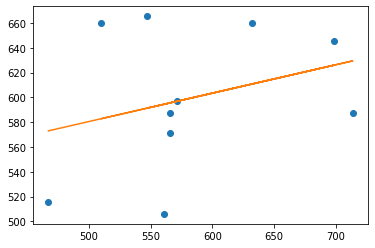

In [49]:
# Plotting along with the regression line
plt.plot(Y_test, predictions, 'o')
m, b = np.polyfit(Y_test, predictions, 1)
plt.plot(Y_test, m*Y_test + b)

In [50]:
# Evaluate predictions
from sklearn import metrics

# Model Metrics
print("R-Square: ", metrics.r2_score(Y_test, predictions))
print("Adjusted R- Square: ", 1 - (1-model4.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(Y_test, predictions))
print("MSE: ", metrics.mean_squared_error(Y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

R-Square:  -0.15643349213042823
Adjusted R- Square:  0.042304149257392565
MAE:  63.339999999999996
MSE:  6279.9079999999985
RMSE:  79.24587055487497


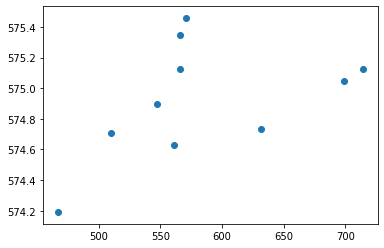

In [51]:
# Building Bayesian Regression Model
from sklearn.linear_model import BayesianRidge
model5 = BayesianRidge()
model5.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions = model5.predict(X_test)
predictions

plt.scatter(Y_test,predictions)

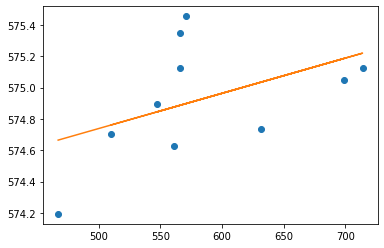

In [52]:
# Plotting along with the regression line
plt.plot(Y_test, predictions, 'o')
m, b = np.polyfit(Y_test, predictions, 1)
plt.plot(Y_test, m*Y_test + b)

In [53]:
# Evaluate predictions
from sklearn import metrics

# Model Metrics
print("R-Square: ", metrics.r2_score(Y_test, predictions))
print("Adjusted R- Square: ", 1 - (1-model5.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(Y_test, predictions))
print("MSE: ", metrics.mean_squared_error(Y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

R-Square:  -0.008435710454577583
Adjusted R- Square:  -0.09202195889513143
MAE:  55.645128137234146
MSE:  5476.219366409642
RMSE:  74.0014821906267


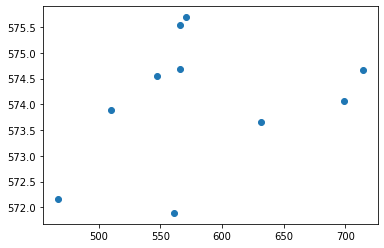

In [54]:
# Building Support Vector Regression Model
from sklearn.svm import SVR
model6 = SVR()
model6.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions = model6.predict(X_test)
predictions

plt.scatter(Y_test,predictions)

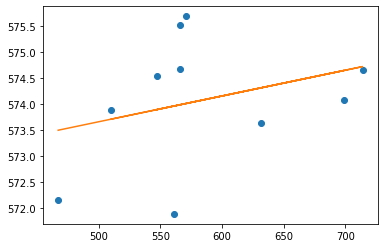

In [55]:
# Plotting along with the regression line
plt.plot(Y_test, predictions, 'o')
m, b = np.polyfit(Y_test, predictions, 1)
plt.plot(Y_test, m*Y_test + b)

In [56]:
# Evaluate predictions
from sklearn import metrics

# Model Metrics
print("R-Square: ", metrics.r2_score(Y_test, predictions))
print("Adjusted R- Square: ", 1 - (1-model6.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(Y_test, predictions))
print("MSE: ", metrics.mean_squared_error(Y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

R-Square:  -0.006010345881831469
Adjusted R- Square:  -0.08595287094621828
MAE:  55.29913098269998
MSE:  5463.048642380156
RMSE:  73.91243902334813


**Note: RandomForest Model is the best model so far as per RMSE based model evaluation. 

Text(0.5, 1.0, 'Top Features derived by Random Forest')

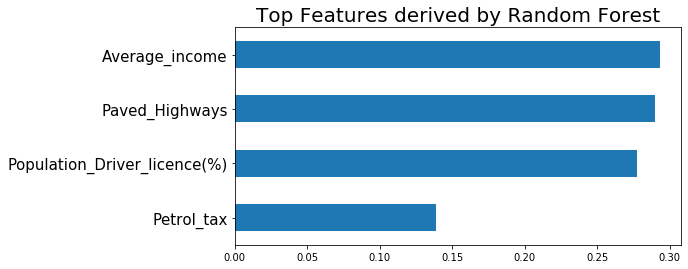

In [57]:
## To look for top features using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# Create decision tree classifer object
rfc = RandomForestClassifier(random_state=123, n_estimators=100)

# Train model,  NO scaling is required
rfc_model = rfc.fit(X, y)
# Plot the top features based on its importance
(pd.Series(rfc_model.feature_importances_, index=X.columns)
    .nlargest(4)   # can adjust based on how many top features you want
    .plot(kind='barh', figsize=[8,4])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

In [58]:
# for linear data and model, p-value < 0.05 indicates a significant feature
import statsmodels.api as sm
X = sm.add_constant(X)  # need to add this to define the Intercept
# model / fit / summarize results
model = sm.OLS(y, X)
result = model.fit()
result.summary()

C:\Users\Urmisha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     22.71
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           3.91e-10
Time:                        22:07:02   Log-Likelihood:                -266.79
No. Observations:                  48   AIC:                             543.6
Df Residuals:                      43   BIC:                             552.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          377.2911    185.541      2.033      0.048       3.112     751.471
Petrol_tax                     -34.7901     12.970     -2.682      0.010     -60.947      -8.633
Average_income                  -0.0666      0.017     -3.867      0.000      -0.101      -0.032
Paved_Highways                  -0.0024      0.003     -0.716      0.478      -0.009       0.004
Population_Driver_licence(%)  1336.4494    192.298      6.950      0.000     948.643    1724.256
==============================================================================
Omnibus:                       15.040   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.510
Skew:                           1.056   Prob(JB):                     5.80e-05
Kurtosis:                       5.300   Cond. No.                     1.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""